-----

### **Mini-Projeto: Análise de Risco e Retorno de Ativos Brasileiros**

Este projeto fará uma análise exploratória das ações da Petrobras (PETR4), e a comparará com o Ibovespa.

-----

#### **Título do Projeto

*Análise Quantitativa de Risco e Retorno: Estudo de Caso com PETR4 e o Índice Ibovespa.*

#### **Objetivo:**

Analisar o comportamento histórico do preço da ação PETR4, calcular suas métricas de risco e retorno, e entender sua relação com o mercado brasileiro (representado pelo Ibovespa) através de visualizações, correlação e uma regressão linear simples para calcular o Beta do ativo.

#### **Ferramentas:**

  * Python
  * Bibliotecas: Pandas (manipulação de dados), yfinance (download de dados do mercado), Matplotlib/Seaborn (visualização) e Scikit-learn (regressão linear).


In [ ]:
# Instala a biblioteca do Yahoo Finance para baixar dados do mercado de ações
!pip install yfinance

#### **Passo 1: Carregar os Dados**

Histórico dos últimos 5 anos para a Petrobras (PETR4.SA) e o índice Ibovespa (^BVSP).

In [ ]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define os tickers (códigos dos ativos) e o período
tickers = ['PETR4.SA', '^BVSP']
start_date = '2020-01-01'
end_date = '2025-01-01'

# Baixa os dados usando a biblioteca yfinance
dados = yf.download(tickers, start=start_date, end=end_date)['Close']

# Renomeia as colunas
dados.rename(columns={'PETR4.SA': 'PETR4', '^BVSP': 'IBOV'}, inplace=True)

# Exibe os 5 primeiros registros
print("Dados brutos:")
print(dados.head())

/tmp/ipython-input-17-4212373844.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Dados brutos:
Ticker         PETR4      IBOV
Date                          
2020-01-02  9.656282  118573.0
2020-01-03  9.577645  117707.0
2020-01-06  9.690882  116878.0
2020-01-07  9.653137  116662.0
2020-01-08  9.593373  116247.0


#### **Passo 2: Limpeza e Preparação dos Dados**

In [ ]:

# Verificação de dados faltantes
print("\nVerificação de dados nulos:")
print(dados.isnull().sum())

# Remoção de quaisquer linhas com dados faltantes (se houver)
dados.dropna(inplace=True)

# Calcula os retornos diários percentuais
retornos = dados.pct_change()
retornos.dropna(inplace=True) # O primeiro dia não terá retorno, então removemos

print("\nRetornos diários:")
print(retornos.head())


Verificação de dados nulos:
Ticker
PETR4    0
IBOV     0
dtype: int64

Retornos diários:
Ticker         PETR4      IBOV
Date                          
2020-01-03 -0.008144 -0.007304
2020-01-06  0.011823 -0.007043
2020-01-07 -0.003895 -0.001848
2020-01-08 -0.006191 -0.003557
2020-01-09 -0.003279 -0.002581


#### **Passo 3: Análise Exploratória e Visualizações**

**a) Gráfico de Preços Históricos:** Para vizualizar a evolução dos ativos.

<Figure size 1400x700 with 0 Axes>

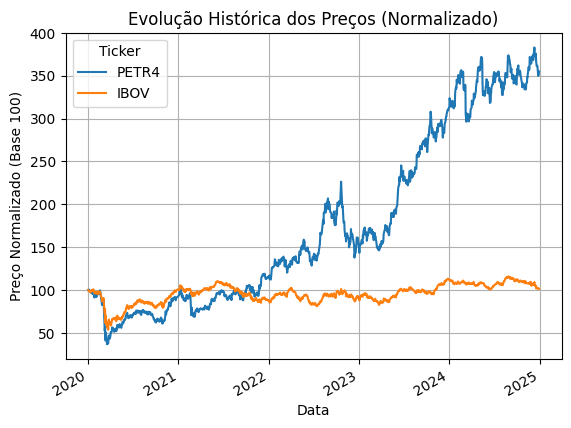

In [ ]:

# Normaliza os dados para começar em 100 e facilitar a comparação visual
dados_normalizados = (dados / dados.iloc[0] * 100)

# Plota o gráfico
plt.figure(figsize=(14, 7))
dados_normalizados.plot()
plt.title('Evolução Histórica dos Preços (Normalizado)')
plt.xlabel('Data')
plt.ylabel('Preço Normalizado (Base 100)')
plt.grid(True)
plt.show()

**b) Histograma dos Retornos Diários:** Para ver a distribuição e a volatilidade.

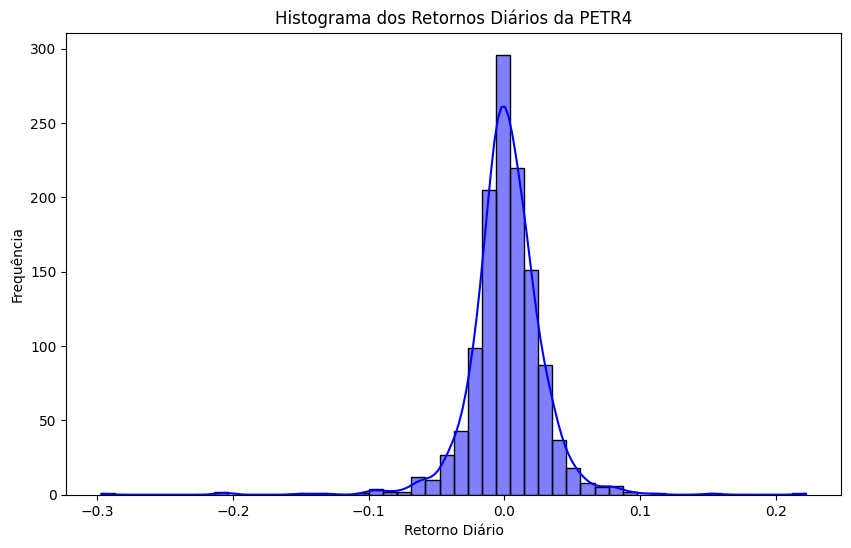

Volatilidade diária da PETR4: 2.81%


In [ ]:

# Plota o histograma dos retornos da PETR4
plt.figure(figsize=(10, 6))
sns.histplot(retornos['PETR4'], bins=50, kde=True, color='blue')
plt.title('Histograma dos Retornos Diários da PETR4')
plt.xlabel('Retorno Diário')
plt.ylabel('Frequência')
plt.show()

# Imprime a volatilidade (desvio padrão dos retornos)
volatilidade_petr4 = retornos['PETR4'].std()
print(f"Volatilidade diária da PETR4: {volatilidade_petr4:.2%}")

#### **Passo 4: Análise de Correlação**

Relação entre os movimentos da PETR4 e do Ibovespa.

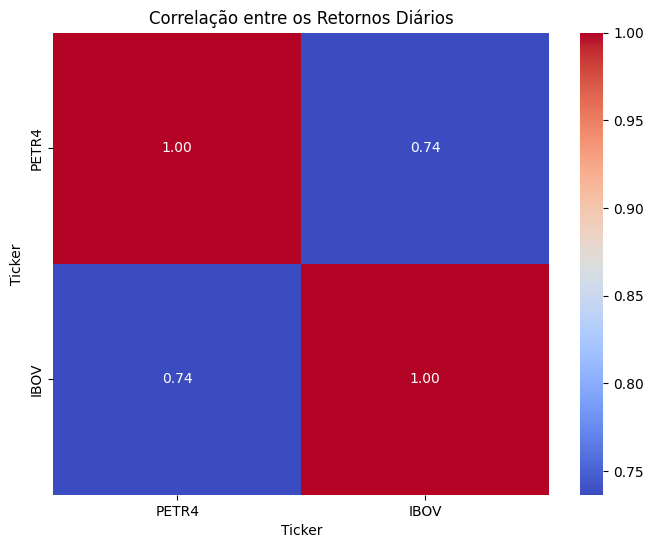


Matriz de Correlação:
Ticker     PETR4      IBOV
Ticker                    
PETR4   1.000000  0.736405
IBOV    0.736405  1.000000


In [ ]:

# Calcula a matriz de correlação
correlacao = retornos.corr()

# Plota um heatmap (mapa de calor) para visualizar a correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre os Retornos Diários')
plt.show()

print("\nMatriz de Correlação:")
print(correlacao)

* **Interpretação:** Um valor próximo de 1 indica que, quando o Ibovespa sobe, a PETR4 tende a subir também.

#### **Passo 5: Regressão Linear Simples (Calculando o Beta)**

O Beta ($\\beta$) é uma medida de risco. Ela nos diz o quão volátil é uma ação em comparação com o mercado como um todo (o Ibovespa).

  * $\\beta = 1$: A ação se move em linha com o mercado.
  * $\\beta > 1$: A ação é mais volátil que o mercado (mais "agressiva").
  * $\\beta < 1$: A ação é menos volátil que o mercado (mais "defensiva").

<!-- end list -->


O Beta da PETR4 em relação ao Ibovespa é: 1.27


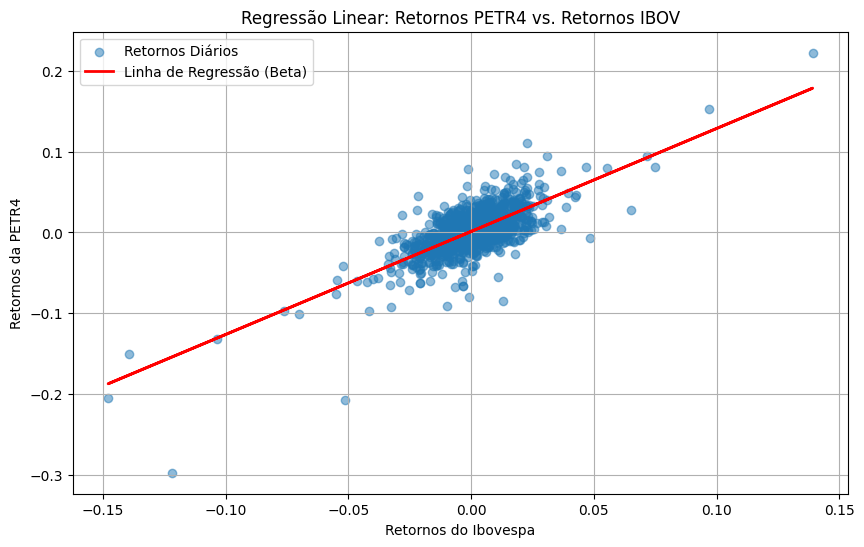

In [ ]:

from sklearn.linear_model import LinearRegression

# Prepara os dados para a regressão
# X é a variável independente (retornos do mercado/IBOV)
# y é a variável dependente (retornos do ativo/PETR4)
X = retornos['IBOV'].values.reshape(-1, 1)
y = retornos['PETR4'].values.reshape(-1, 1)

# Cria e treina o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# O coeficiente angular da regressão é o Beta
beta = modelo.coef_[0][0]

print(f'\nO Beta da PETR4 em relação ao Ibovespa é: {beta:.2f}')

# Plot visual da regressão (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Retornos Diários')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Linha de Regressão (Beta)')
plt.title('Regressão Linear: Retornos PETR4 vs. Retornos IBOV')
plt.xlabel('Retornos do Ibovespa')
plt.ylabel('Retornos da PETR4')
plt.legend()
plt.grid(True)
plt.show()